In [13]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import GlobalMaxPooling2D
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
import numpy as np
from numpy.linalg import norm
import os
from tqdm import tqdm
import pickle
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import cv2

In [2]:
import zipfile
import os

zip_path = "/content/images.zip"  # change name if needed
try:
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall("/content/")
    print(f"Successfully extracted files from {zip_path}")
except zipfile.BadZipFile:
    print(f"Error: The file at {zip_path} is not a valid zip file. Please check its integrity or provide a different zip file.")
except FileNotFoundError:
    print(f"Error: The file at {zip_path} was not found. Please ensure the file exists.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

Error: The file at /content/images.zip was not found. Please ensure the file exists.


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Once your Drive is mounted, you can copy the file from your Drive to the Colab environment. Replace `"/content/drive/MyDrive/path/to/your/images.zip"` with the actual path to your zip file in Google Drive.

In [5]:
import shutil
import os

source_path = "/content/drive/MyDrive/images.zip" # <--- CHANGE THIS TO YOUR FILE'S PATH IN GOOGLE DRIVE
destination_path = "/content/images.zip"

try:
    if os.path.exists(source_path):
        shutil.copyfile(source_path, destination_path)
        print(f"Successfully copied '{source_path}' to '{destination_path}'")
    else:
        print(f"Error: Source file '{source_path}' not found in Google Drive. Please check the path.")
except Exception as e:
    print(f"An error occurred while copying the file: {e}")

Successfully copied '/content/drive/MyDrive/images.zip' to '/content/images.zip'


After copying, you can try extracting the zip file again using the previous code cell.

In [6]:
import zipfile
import os

zip_path = "/content/images.zip"

try:
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        print(f"Successfully opened {zip_path}. It contains the following files and directories:")
        for name in zip_ref.namelist():
            print(f"- {name}")
    print("Zip file integrity check passed.")
except zipfile.BadZipFile:
    print(f"Error: The file at {zip_path} is a corrupted or invalid zip file.")
except FileNotFoundError:
    print(f"Error: The file at {zip_path} was not found. Please ensure the file exists at this path.")
except Exception as e:
    print(f"An unexpected error occurred while verifying the zip file: {e}")

Successfully opened /content/images.zip. It contains the following files and directories:
- images/
- images/10000.jpg
- images/10001.jpg
- images/10002.jpg
- images/10003.jpg
- images/10004.jpg
- images/10005.jpg
- images/10006.jpg
- images/10007.jpg
- images/10008.jpg
- images/10009.jpg
- images/10010.jpg
- images/10011.jpg
- images/10012.jpg
- images/10013.jpg
- images/10014.jpg
- images/10015.jpg
- images/10016.jpg
- images/10017.jpg
- images/10018.jpg
- images/10019.jpg
- images/10020.jpg
- images/10021.jpg
- images/10022.jpg
- images/10023.jpg
- images/10024.jpg
- images/10025.jpg
- images/10026.jpg
- images/10027.jpg
- images/10028.jpg
- images/10029.jpg
- images/10030.jpg
- images/10031.jpg
- images/10032.jpg
- images/10033.jpg
- images/10034.jpg
- images/10035.jpg
- images/10037.jpg
- images/10039.jpg
- images/10040.jpg
- images/10041.jpg
- images/10042.jpg
- images/10043.jpg
- images/10044.jpg
- images/10045.jpg
- images/10046.jpg
- images/10047.jpg
- images/10048.jpg
- image

In [7]:
# -------------------------
# Load Model
# -------------------------
print("Loading model...")

base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224,224,3))
base_model.trainable = False

model = tf.keras.Sequential([
    base_model,
    GlobalMaxPooling2D()
])

print("Model loaded successfully!")

Loading model...
94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Model loaded successfully!


In [8]:
# -------------------------
# Feature Extraction Function
# -------------------------
def extract_features(img_path, model):
    img = image.load_img(img_path, target_size=(224,224))
    img_array = image.img_to_array(img)
    expanded_img_array = np.expand_dims(img_array, axis=0)
    preprocessed_img = preprocess_input(expanded_img_array)

    result = model.predict(preprocessed_img, verbose=0).flatten()
    normalized_result = result / norm(result)

    return normalized_result

In [9]:
# -------------------------
# Load Dataset Images
# -------------------------
image_folder = "images"
zip_path = "/content/images.zip" # Assuming this path is correct from previous operations

if not os.path.exists(image_folder):
    print(f"❌ Folder '{image_folder}' not found. Attempting to extract from '{zip_path}'.")
    import zipfile
    try:
        with zipfile.ZipFile(zip_path, 'r') as zip_ref:
            zip_ref.extractall("/content/") # Extract to the same directory
        print(f"Successfully extracted files from {zip_path}")
    except zipfile.BadZipFile:
        raise FileNotFoundError(f"Error: The file at {zip_path} is not a valid zip file. Please check its integrity or provide a different zip file.")
    except FileNotFoundError:
        raise FileNotFoundError(f"Error: The file at {zip_path} was not found. Please ensure the file exists before attempting extraction.")
    except Exception as e:
        raise Exception(f"An unexpected error occurred during extraction: {e}")

# Re-check if the folder exists after attempted extraction
if not os.path.exists(image_folder):
    raise FileNotFoundError(f"❌ Folder '{image_folder}' still not found after extraction attempt. Please verify the zip file contents.")

filenames = [os.path.join(image_folder, file) for file in os.listdir(image_folder)]
print(f"\n📁 {len(filenames)} images found.")

❌ Folder 'images' not found. Attempting to extract from '/content/images.zip'.
Successfully extracted files from /content/images.zip

📁 44441 images found.


In [10]:
# -------------------------
# Extract and Save Embeddings
# -------------------------
feature_list = []

print("\n🔍 Extracting features...")
for file in tqdm(filenames):
    feature_list.append(extract_features(file, model))

print("\n✨ Feature extraction completed.")


pickle.dump(feature_list, open("embeddings.pkl", "wb"))
pickle.dump(filenames, open("filenames.pkl", "wb"))

print("\n📌 Files saved:")
print("➡ embeddings.pkl")
print("➡ filenames.pkl\n")


🔍 Extracting features...


100%|██████████| 44441/44441 [1:02:41<00:00, 11.81it/s]



✨ Feature extraction completed.

📌 Files saved:
➡ embeddings.pkl
➡ filenames.pkl



In [11]:
# -------------------------
# Test: Find Similar Images
# -------------------------

print("🧪 Running Similarity Test...")


# Load back the saved data (optional)
feature_list = np.array(feature_list)

# Build Nearest Neighbor Model
neighbors = NearestNeighbors(n_neighbors=6, algorithm='brute', metric='cosine')
neighbors.fit(feature_list)

# Pick a test image from dataset
test_img_path = filenames[0]  # change index to test different images

print(f"\n🔎 Finding similar images to: {os.path.basename(test_img_path)}")

test_feature = extract_features(test_img_path, model)
distances, indices = neighbors.kneighbors([test_feature])

🧪 Running Similarity Test...

🔎 Finding similar images to: 12833.jpg


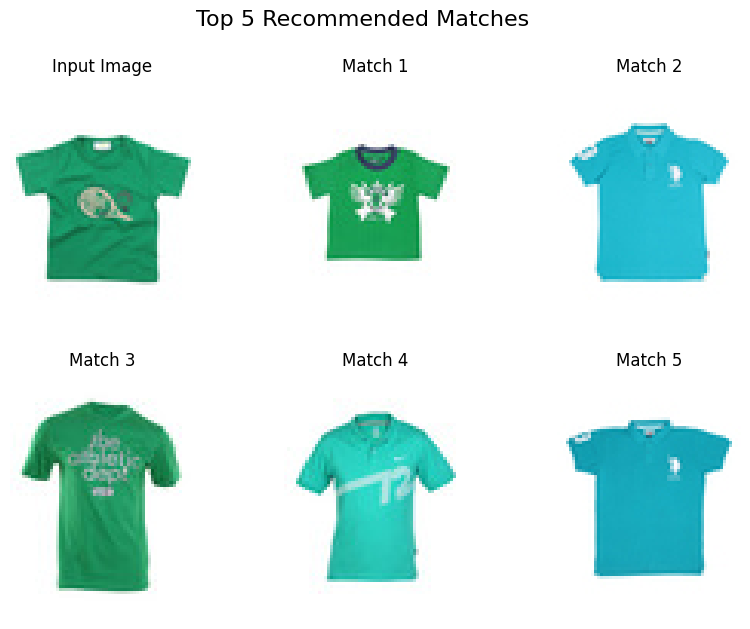


🎉 Recommendation test complete!


In [12]:
# -------------------------
# Visualization
# -------------------------
plt.figure(figsize=(10,7))
plt.suptitle("Top 5 Recommended Matches", fontsize=16)

# Show the test image
plt.subplot(2, 3, 1)
plt.imshow(image.load_img(test_img_path))
plt.title("Input Image")
plt.axis("off")

# Show top 5 similar images
for i, index in enumerate(indices[0][1:]):
    similar_img = filenames[index]
    plt.subplot(2, 3, i + 2)
    plt.imshow(image.load_img(similar_img))
    plt.title(f"Match {i+1}")
    plt.axis("off")

plt.show()

print("\n🎉 Recommendation test complete!")

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
[[ 6478 40229 26380 18663  3833 33362]]


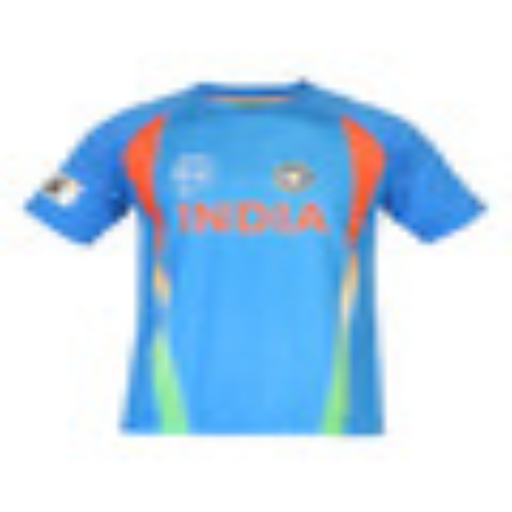

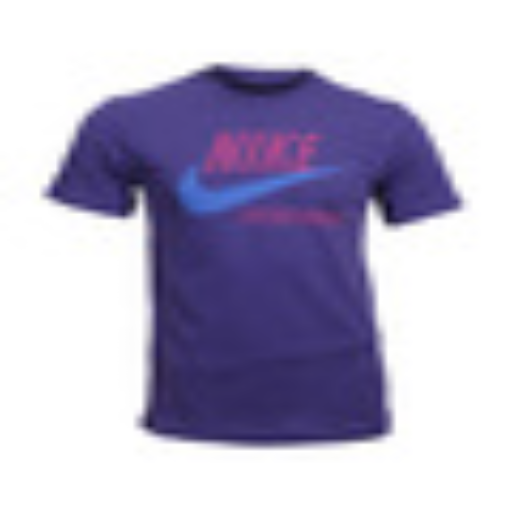

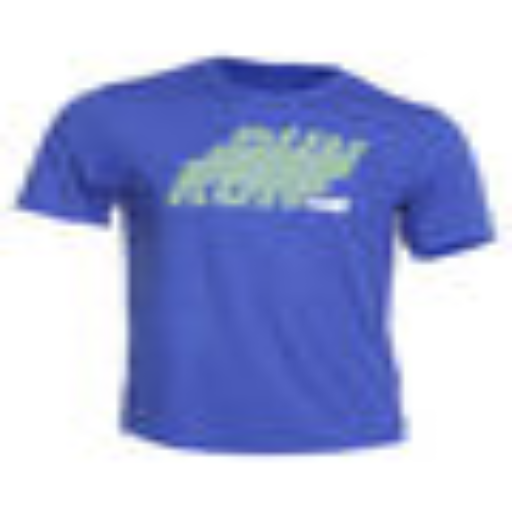

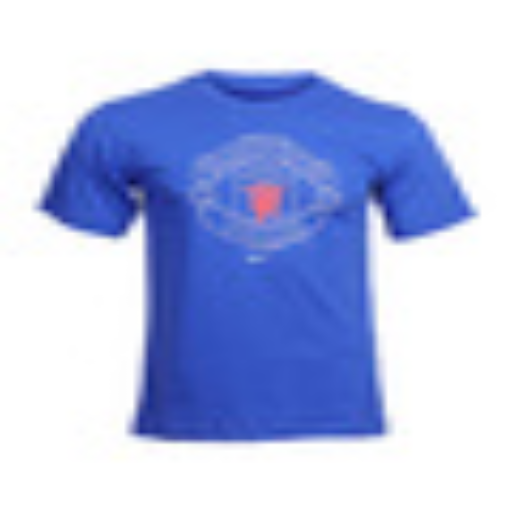

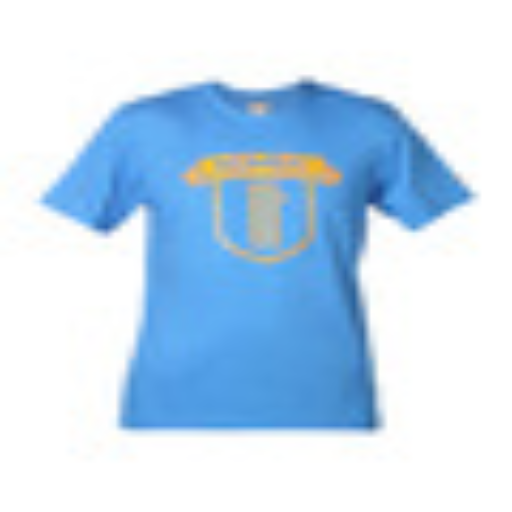

In [16]:
feature_list = np.array(pickle.load(open('embeddings.pkl','rb')))
filenames = pickle.load(open('filenames.pkl','rb'))

model = ResNet50(weights='imagenet',include_top=False,input_shape=(224,224,3))
model.trainable = False

model = tf.keras.Sequential([
    model,
    GlobalMaxPooling2D()
])

img = image.load_img('shirt.jpg',target_size=(224,224))
img_array = image.img_to_array(img)
expanded_img_array = np.expand_dims(img_array, axis=0)
preprocessed_img = preprocess_input(expanded_img_array)
result = model.predict(preprocessed_img).flatten()
normalized_result = result / norm(result)

neighbors = NearestNeighbors(n_neighbors=6,algorithm='brute',metric='euclidean')
neighbors.fit(feature_list)

distances,indices = neighbors.kneighbors([normalized_result])

print(indices)

# Import cv2_imshow from google.colab.patches
from google.colab.patches import cv2_imshow

for file in indices[0][1:6]:
    temp_img = cv2.imread(filenames[file])
    # Use cv2_imshow instead of cv2.imshow
    cv2_imshow(cv2.resize(temp_img,(512,512)))
    cv2.waitKey(0)
